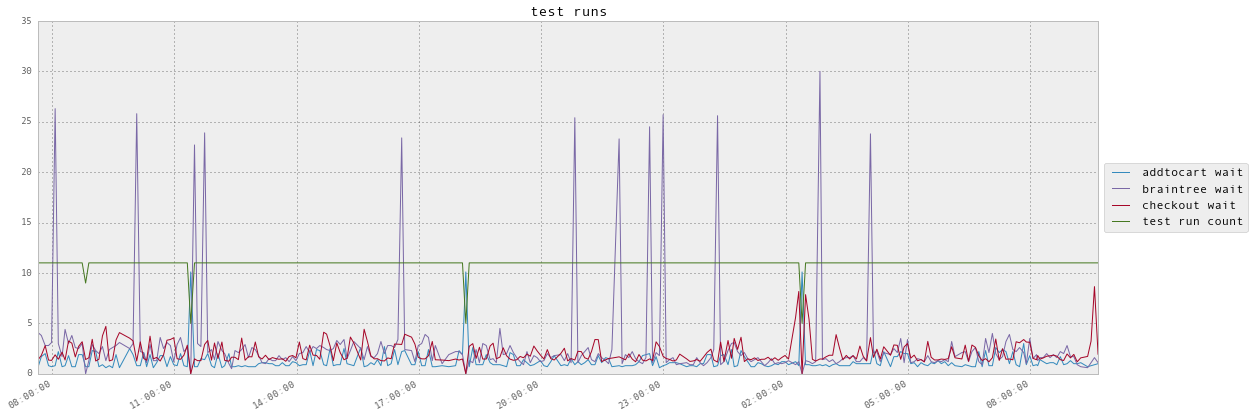

In [4]:
"""
Plot the data from the test runs against the Gifts.com QA environment
"""
import MySQLdb
import matplotlib.pyplot as plt
import json
conn = MySQLdb.connect('giftsqa.proflowers.com','gifts_tests','gifts_tests@@', 'gifts_tests')
crs = conn.cursor(MySQLdb.cursors.DictCursor)
#crs.execute('SELECT * FROM test_runs order by id desc limit 200')
#crs.execute('SELECT * FROM test_runs where name = "search-and-purchase_magento_only_PROD" order by id desc limit 100')
crs.execute('SELECT * FROM test_runs where name = "search-and-purchase_PROD" order by id desc limit 300')
test_ids = list()
test_counts = list()
test_datetimes = list()
declined_waits = list()
addtocart_waits = list()
checkout_waits = list()
for row in crs.fetchall():
    #print row  # ['test_count'], row['test_stats']
    test_counts.insert(0,int(row['test_count']))
    test_ids.insert(0,int(row['id']))
    test_stats = json.loads(row['test_stats'])
    test_datetimes.insert(0,row['created'])
    # print test_stats
    if test_stats.has_key('transaction_declined_wait'):
        btwait = test_stats['transaction_declined_wait']
        # if btwait > 12:
        #    btwait = 12
        declined_waits.insert(0,float(btwait))
    else:
        declined_waits.insert(0,0)
    if test_stats.has_key('add_to_cart_wait'):
        addtocart_waits.insert(0,float(test_stats['add_to_cart_wait']))
    else:
        addtocart_waits.insert(0,0)
    if test_stats.has_key('click_checkout_wait'):
        checkout_waits.insert(0, float(test_stats['click_checkout_wait']))
    else:
        checkout_waits.insert(0,0)
# plt.plot(test_datetimes,test_counts, 'blue', test_datetimes, declined_waits, 'green', test_datetimes, addtocart_waits, 'black')
import numpy as np
import pandas as pd
pd.options.display.mpl_style = 'default'
#data = {'braintree wait': declined_waits,'checkout wait': checkout_waits}
data = {'braintree wait': declined_waits, 'addtocart wait': addtocart_waits, 'test run count': test_counts , 'checkout wait': checkout_waits}
trans = pd.DataFrame(data=data,index=test_datetimes)
trans.plot(figsize=(19, 7), title='test runs').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
from IPython.display import display
#display(trans) # display the 'spreadsheet'
#trans.plot(kind='area', stacked=False, title="Test Runs")
#trans.plot(kind='bar', stacked=False, bottom=None,legend=None, title="Test Runs", figsize=(20, 5))